Dataset loaded successfully!
Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0 

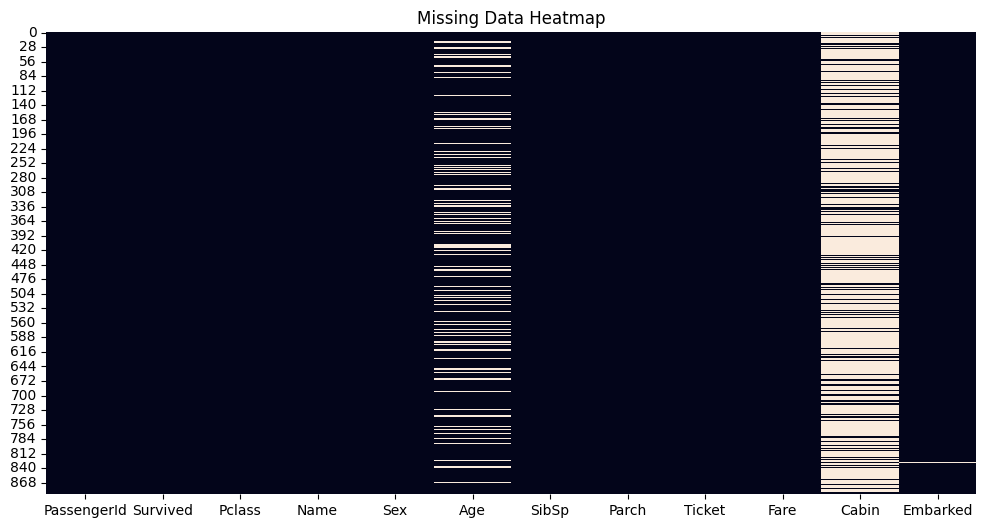

Ground truth metadata saved to ../data/metadata/ground_truth_metadata.csv


In [5]:
# Day 1: Dataset Preparation (Titanic dataset)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# -----------------------------
# Step 0: Set paths
# -----------------------------
raw_data_path = "../data/raw/titanic.csv"  # Your Titanic CSV
cleaned_data_path = "../data/cleaned/dirty_dataset.csv"
report_output_path = "../reports/baseline_report.txt"

# -----------------------------
# Step 1: Load dataset
# -----------------------------
df = pd.read_csv(raw_data_path)
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(df.head())

# -----------------------------
# Step 2: Missing values
# -----------------------------
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# -----------------------------
# Step 3: Duplicates
# -----------------------------
duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicates}")

# -----------------------------
# Step 4: Basic statistics
# -----------------------------
print("\nBasic statistics:\n", df.describe(include='all'))

# -----------------------------
# Step 5: Outlier detection (Z-score)
# -----------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_cols].fillna(0)))
outlier_flags = (z_scores > 3).sum(axis=1)
print(f"\nNumber of rows with potential outliers: {(outlier_flags>0).sum()}")

# -----------------------------
# Step 6: Save dirty dataset copy
# -----------------------------
os.makedirs(os.path.dirname(cleaned_data_path), exist_ok=True)
df.to_csv(cleaned_data_path, index=False)
print(f"\nDirty dataset saved to {cleaned_data_path}")

# -----------------------------
# Step 7: Generate simple baseline report (text + plots)
# -----------------------------
os.makedirs(os.path.dirname(report_output_path), exist_ok=True)

with open(report_output_path, 'w') as f:
    f.write("Baseline Data Quality Report\n")
    f.write("===========================\n\n")
    f.write(f"Shape: {df.shape}\n\n")
    f.write("Missing values:\n")
    f.write(str(missing_values))
    f.write("\n\n")
    f.write(f"Total duplicate rows: {duplicates}\n\n")
    f.write("Basic statistics:\n")
    f.write(str(df.describe(include='all')))
    f.write("\n\n")
    f.write(f"Number of rows with potential outliers: {(outlier_flags>0).sum()}\n")

print(f"\nBaseline report saved to {report_output_path}")

# -----------------------------
# Step 8: Visualize missing data
# -----------------------------
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# -----------------------------
# Step 9: Create ground truth metadata
# -----------------------------
metadata_path = "../data/metadata/ground_truth_metadata.csv"
os.makedirs(os.path.dirname(metadata_path), exist_ok=True)

# Create a copy of your dataset
metadata_df = df.copy()

# Flag missing values
for col in df.columns:
    metadata_df[col + "_missing"] = df[col].isnull().astype(int)  # 1 if missing, 0 if not

# Flag duplicates (1 if row is duplicated)
metadata_df["duplicate"] = df.duplicated().astype(int)

# Flag potential outliers using Z-score for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols].fillna(0)))
metadata_df["outlier_flag"] = (z_scores > 3).any(axis=1).astype(int)

# Save metadata
metadata_df.to_csv(metadata_path, index=False)
print(f"Ground truth metadata saved to {metadata_path}")
